In [19]:
#Using CNN for handwriting Recognition this time around
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop

In [20]:
(mnist_train_images,mnist_train_labels),(mnist_test_images,mnist_test_labels)=mnist.load_data()

In [21]:
# (1,28,28) 1 indicates color channel 28*28 is 28*28 pixels
from tensorflow.keras import backend as K 

if K.image_data_format()=='channels_first':
    train_images=mnist_train_images.reshape(mnist_train_images.shape[0],1,28,28)
    test_images=mnist_test_images.reshape(mnist_test_images[0],1,28,28)
    input_shape=(1,28,28)
else:
    train_images=mnist_train_images.reshape(mnist_train_images.shape[0],28,28,1)
    test_images=mnist_test_images.reshape(mnist_test_images.shape[0],28,28,1)
    input_shape=(28,28,1)

train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images/=255
test_images/=255

In [22]:
#one hot categorical data
train_labels=tensorflow.keras.utils.to_categorical(mnist_train_labels,10)
test_labels=tensorflow.keras.utils.to_categorical(mnist_test_labels,10)

[0  1  2  3  4  5  6  7  8  9]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


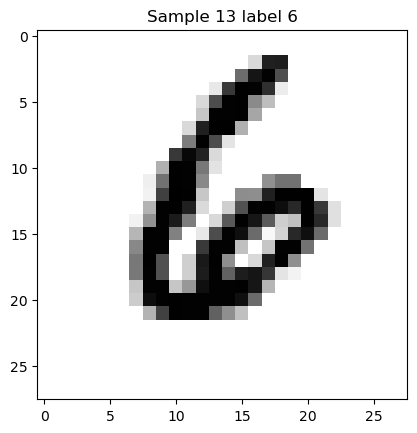

In [ ]:
import matplotlib.pyplot as plt

def display_sample(num):
    #print label
    print("[0  1  2  3  4  5  6  7  8  9]")
    #print the one hot array of this sample's label
    print(train_labels[num])
    #print label converted back to a number
    label=train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 29X28 image
    image=train_images[num].reshape([28,28])
    plt.title(f'Sample {num} label {label}')
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(13)

In [24]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

#64 3X3 Kenels
model.add(Conv2D(64,(3,3),activation='relu'))
#Reduce by taking the max of each 2X2 block
model.add(MaxPooling2D(pool_size=(2,2)))
#Dropout to avoid overfitting
model.add(Dropout(0.25))
#Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
#A hidden layer to Learn with
model.add(Dense(128,activation='relu'))
#Another dropout
model.add(Dropout(0.5))
#Final categorization from 0-9 with softmax
model.add(Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.fit(train_images,train_labels,batch_size=16,epochs=10,verbose=2,validation_data=(test_images,test_labels))

Epoch 1/10
3750/3750 - 38s - loss: 0.1865 - accuracy: 0.9433 - val_loss: 0.0431 - val_accuracy: 0.9851 - 38s/epoch - 10ms/step
Epoch 2/10
3750/3750 - 35s - loss: 0.0813 - accuracy: 0.9757 - val_loss: 0.0334 - val_accuracy: 0.9906 - 35s/epoch - 9ms/step
Epoch 3/10
3750/3750 - 34s - loss: 0.0598 - accuracy: 0.9820 - val_loss: 0.0319 - val_accuracy: 0.9890 - 34s/epoch - 9ms/step
Epoch 4/10
3750/3750 - 34s - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0312 - val_accuracy: 0.9907 - 34s/epoch - 9ms/step
Epoch 5/10
3750/3750 - 34s - loss: 0.0428 - accuracy: 0.9869 - val_loss: 0.0402 - val_accuracy: 0.9880 - 34s/epoch - 9ms/step
Epoch 6/10
3750/3750 - 34s - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0247 - val_accuracy: 0.9924 - 34s/epoch - 9ms/step
Epoch 7/10
3750/3750 - 35s - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0372 - val_accuracy: 0.9903 - 35s/epoch - 9ms/step
Epoch 8/10
3750/3750 - 35s - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.0298 - val_accuracy: 0.9922 - 35s/epoch - 

In [28]:
score=model.evaluate(test_images,test_labels,verbose=0)
print('Test loss: ',score[0])
print('Test Accuracy: ',score[1])

Test loss:  0.03089679777622223
Test Accuracy:  0.9915000200271606


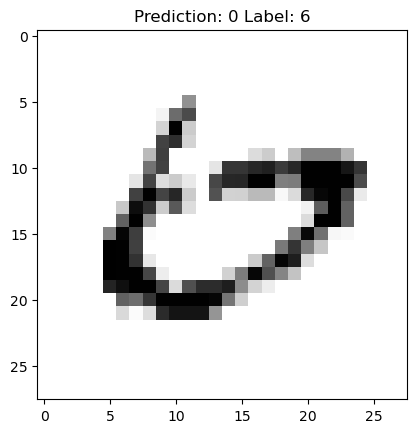

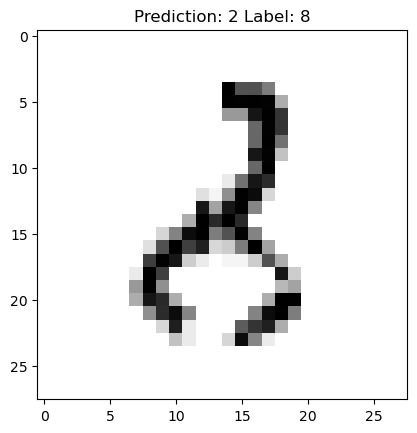

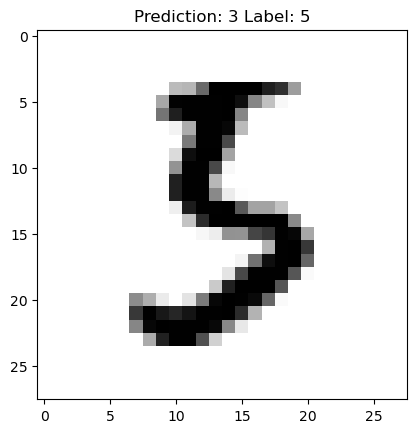

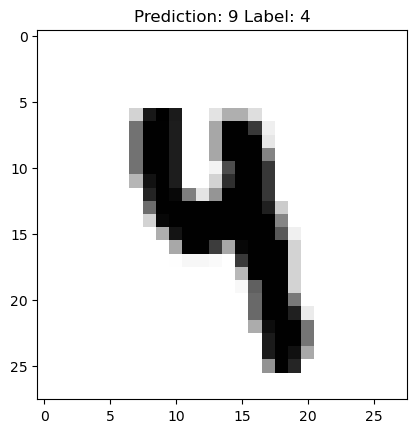

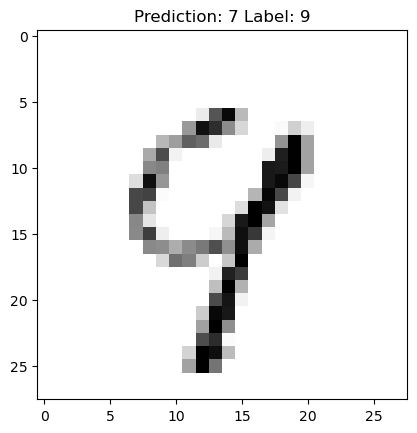

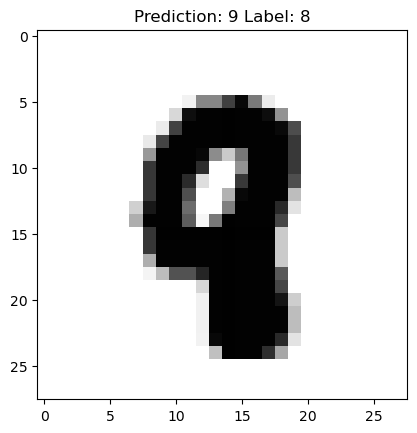

In [34]:
#lets visualize where our NN had challenges and gone wrong
for x in range(1000):
    test_image=test_images[x].reshape(1,28,28)
    test_image=test_image.astype('float32')
    predicted_cat=model.predict(test_image,verbose=0).argmax()
    label=test_labels[x].argmax()
    if(predicted_cat != label):
        plt.title('Prediction: %d Label: %d' %(predicted_cat,label))
        plt.imshow(test_image.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()